<center> <h1> PSI3431 - Experiência 3 - Processos Estocásticos </h1> </center> <br> 
    
 Nome | NUSP 
 :--------------: | :--------------: 
 Bruno Mucha Pasini | 10845791 
 Pedro Henrique Gianjoppe dos Santos | 10774055 
 Caio Hudson Queiroz de Souza | 10773885 

In [2]:
 import Pkg; Pkg.add("SampledSignals")
 import Pkg; Pkg.add("PyCall")
 #import Pkg; Pkg.add("Plots")
 #import Pkg; Pkg.add("WAV")
 #import Pkg; Pkg.add("DSP")
 #import Pkg; Pkg.add("Statistics")
 #import Pkg; Pkg.add("LaTeXStrings")
 #import Pkg; Pkg.add("PlotlyJS")
 import Pkg; Pkg.add("FixedPointNumbers")
 using SampledSignals
 using PyCall
 using Plots
 using Statistics
 using WAV
 using DSP
 using LaTeXStrings
 using FixedPointNumbers
 include("fxfilt.jl");
 plotlyjs();

   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`


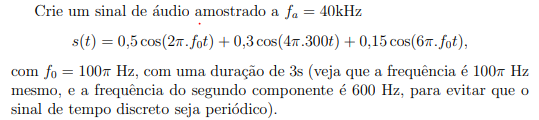

In [3]:
#Construção do sinal
fa=40000
t=0:(1/fa):3
f0=100*π;
s=0.5*cos.(2*π*f0*t)+0.3*cos.(4*π*300*t)+0.15*cos.(6*π*f0*t);

In [4]:
#Para ouvir o sinal
sq=Fixed{Int16,4}.(s)
yq = SampleBuf(sq, fa)

120001-frame, 1-channel SampleBuf{Q11f4, 1}
3.000025s sampled at 40000.0Hz
▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇

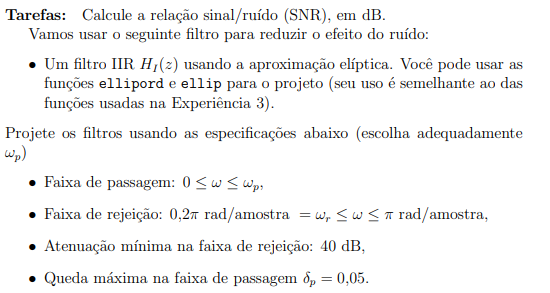

In [5]:
#Cálculo da relação sinal/ruído (SRN) na entrada
Pots=(0.5^2)/2 + (0.3^2)/2 + (0.15^2)/2

#Relação sinal ruído (considerando precisão finita no sinal de entrada, com quantização de B0 = 12 bits)
B0=12;
Pote=(2.0^(-2*B0))/3

SNRin = pow2db(Pots/Pote);

print("Relação sinal ruído de entrada: ", SNRin, " dB")

Relação sinal ruído de entrada: 69.60119165898243 dB

In [6]:
#Especificações do filtro
ωp = 0.07*π
ωr = 0.2*π
Ar = 40
δr = 10^(-Ar/20)
δp =0.05
Ap =-20*log10(1-δp);

In [7]:
#Implementação do filtro
import Pkg; Pkg.add("Conda")
using Conda
Conda.add("scipy")

sig = pyimport("scipy.signal")
N,Wn=sig.ellipord(ωp/π,ωr/π,Ap,Ar)
b,a=sig.ellip(N,Ap,Ar,Wn)
h=PolynomialRatio(b,a)
ω = range(0, π, length = 500)
H=freqz(h,ω);

   Resolving package versions...
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\bruno\.julia\environments\v1.6\Manifest.toml`
┌ Info: Running `conda install -y scipy` in root environment
└ @ Conda C:\Users\bruno\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

# All requested packages already installed.



In [8]:
#Resposta em frequência do filtro (escala linear)

p1 = plot(ω/pi, abs.(H), xlabel = "w/pi", ylabel = "|Ha(e^jw)|", label = "|H(e^jw)|")

p2 = plot(ω/pi,  unwrap(angle.(H))*180/pi, xlabel = "w/pi", ylabel = "/_H(e^jw)", label = "/_H(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

<!DOCTYPE html>
 
 
 Plots.jl

In [9]:
#Resposta em frequência do filtro (escala logarítmica)

plot(ω / π, 20log10.(abs.(H)), xlabel = "ω (rad/amostra)", label = "|H(e^jω)|", linewidth = 2)
plot!([0, ωp/π], 20log10.(fill(1-δp, 2)), line = :red)
plot!([0, ωp/π], 20log10.(fill(1+δp, 2)), line = :red)
plot!([ωr/π, 1], 20log10.(fill(δr, 2)), line = :red)
plot!(fill(ωp/π, 2), [-80, 20log10.(1-δp)], line = :red)
plot!(fill(ωr/π, 2), [20log10.(δr), 0], line = :red)

<!DOCTYPE html>
 
 
 Plots.jl

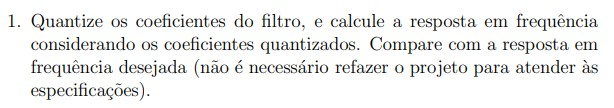

In [10]:
#Quantização do Filtro
Bc = 12 #Precisão finita com 12 bits para quantização dos coeficientes do filtro 

bq = Float64.(Fixed{Int16,Bc-1}.(b));
aq = Float64.(Fixed{Int16,Bc-1}.(a));

print("bq: ", bq);

print("\n");

print("aq: ", aq);

hq = PolynomialRatio(bq,aq);

ω = range(0, π, length = 500);

Hq = freqz(hq,ω);

#Resposta em frequência do filtro quantizado

p1 = plot(ω/pi, abs.(Hq), xlabel = "w/pi", ylabel = "|Hq(e^jw)|", label = "|Hq(e^jw)|")

p2 = plot(ω/pi,  angle.(Hq)*180/pi, xlabel = "w/pi", ylabel = "/_Hq(e^jw)", label = "/_Hq(e^jw)", line = :magenta)

plot(p1, p2, layout = (2,1))

bq: [0.00830078125, -0.0048828125, -0.0048828125, 0.00830078125]
aq: [1.0, -2.68408203125, 2.4453125, -0.75390625]

<!DOCTYPE html>
 
 
 Plots.jl

In [11]:
#Comparação da resposta em frequência do filtro normal (H) e do filtro quantizado (Hq) com 12 bits

plot(ω/pi, abs.(H), xlabel = "w/pi", ylabel = "|H(e^jw)|", label = "|H(e^jw)|")

plot!(ω/pi, abs.(Hq), xlabel = "w/pi", label = "|Hq(e^jw)| 12 bits")


<!DOCTYPE html>
 
 
 Plots.jl

In [12]:
#Quantização do Filtro: Comparação entre diferentes valores de resolução (bits)

#H_vector = []

#for Bi in 8:2:14
    #print(Bi)
    
   # bqi = Float64.(Fixed{Int16,Bi-1}.(b))
   # aqi = Float64.(Fixed{Int16,Bi-1}.(a));

    #hqi = PolynomialRatio(bqi,aqi)

    #Hqi = freqz(hqi,ω)
    
    #H_vector.apend(Hqi)
        
    #legend = string("|Hq(e^jw)| ", Bi, " bits")
        
    #print(legend)

#end

#ω = range(0, π, length = 500)

#plot(ω/pi, abs.(H), xlabel = "w/pi", ylabel = "|H(e^jw)|", label = "|H(e^jw)|")

#plot!(ω/pi, abs.(Hqi[0]), xlabel = "w/pi", label = legend)

#plot!(ω/pi, abs.(Hqi[1]), xlabel = "w/pi", label = legend)

#plot!(ω/pi, abs.(Hqi[2]), xlabel = "w/pi", label = legend)


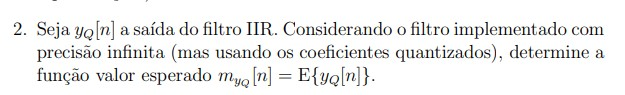

O ruído devido aos coeficientes quantizados do filtro pode ser tratado como uma variável aleatória independente do sinal de entrada, sendo modelado como a distribuição uniforme a seguir:

$\varepsilon[n] = y_{q}[n] - y_{}[n] \sim Unif(-2^{-Bc},+2^{-Bc})$

${Bc}$ refere-se ao número de bits utilizado na quantização dos coeficientes do filtro IIR. 

Como o filtro IIR é linear, podemos usar o princípio da superposição: $y_{q}[n] = \varepsilon[n] + y[n]$

Logo, o valor esperado da saída $m_{yQ}[n] = E\{y_{q}[n]\} = E\{\varepsilon[n]\} + E\{y[n]\}$

Temos que o ruído de quantização $\varepsilon[n]$ é iid e, portanto, estático e ergódico, com $E\{\varepsilon[n]\} = 0$

Temos que o sinal $y[n]$ é determinístico, ou seja, $E\{y[n]\} = y[n]$

Com isso, obtemos: $m_{yQ}[n] = E\{y_{q}[n]\} = y[n]$

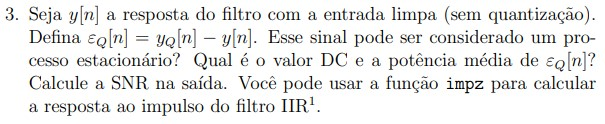

O ruído devido à quantização pode ser tratado como uma variável aleatória independente do sinal de entrada, sendo modelado como a distribuição uniforme a seguir:

$\varepsilon_{Q}[n] = y_{q}[n] - y_{}[n] \sim Unif(-2^{-B0},+2^{-B0})$, onde ${B0}$ refere-se ao número de bits utilizado na quantização do sinal de entrada e dos coeficientes do filtro IIR. 

Temos que o ruído de quantização $\varepsilon_{Q}[n]$ é iid e, portanto, estático e ergódico.

Devido ao cárater da distribuição uniforme simétrica do ruído, temos que seu valor esperado é $E\{\varepsilon_{Q}[n]\} = 0$

Devido ao caráter ergódico e estacionário do ruído do sinal de entrada, temos que sua potência média é $Pot_{\varepsilon_{in}[n]} = E\{\varepsilon_{in}[n]^{2}\}$ 

\begin{equation}
E\{\varepsilon_{in}[n]^{2}\} = \sigma_{\varepsilon_{in}}^2 = \frac{1}{2^{-B_{c}+1}}\int_{-2^{-B_{c}}}^{+2^{-B_{c}}}\varepsilon ^{2}d\varepsilon = \frac{2^{-2\cdot B_{c}}}{3} 
\end{equation}

Dessa forma, podemos calcular a potência do ruído de saída $\varepsilon_{Q}[n]$ usando a potência do ruído de entrada $\varepsilon_{in}[n]$ e a resposta em frequência do filtro :

\begin{equation}
Pot_{\varepsilon_{Q}[n]} = \int_{-\pi }^{\pi }\left | H(e^{jw}) \right |^2 \cdot \sigma_{\varepsilon_{in}}^2 dw
\end{equation}

Usando o teorema de parseval:

\begin{equation}
Pot_{\varepsilon_{Q}[n]} = \sigma_{\varepsilon_{in}}^2 \cdot \sum_{n = 0}^{\infty }h[n]^2
\end{equation}



In [13]:
fa=40000
t=0:(1/fa):3
f0=100*π;
s=0.5*cos.(2*π*f0*t)+0.3*cos.(4*π*300*t)+0.15*cos.(6*π*f0*t);
Pots=(0.5^2)/2 + (0.3^2)/2 + (0.15^2)/2

#Potência do ruído de entrada 
B0=12;
σin=(2.0^(-2*B0))/3

#Relação sinal ruído da saída
SNRin = pow2db(Pots/σin);

#Valor DC e Potência do ruído de saída
EϵQ = 0 #Valor DC de ϵQ
PotϵQ= σin*sum(impz(hq,500).^2) #Potência média de ϵQ

#Relação sinal ruído da saída
SNRout = pow2db(Pots/PotϵQ) #SNR

print("Relação sinal ruído de entrada (SNR entrada): ", SNRin, " dB \n")
print("Relação sinal ruído de saída (SNR saída): ", SNRout, " dB \n")
print("Valor DC de ϵQ[n]: ", EϵQ, "\n")
print("Potência média de ϵQ[n]: ", PotϵQ, " W\n")
print("Potência média de ϵQ[n]: ", pow2db(PotϵQ), " dB\n")

Relação sinal ruído de entrada (SNR entrada): 69.60119165898243 dB 
Relação sinal ruído de saída (SNR saída): 81.206813670901 dB 
Valor DC de ϵQ[n]: 0
Potência média de ϵQ[n]: 1.3727664232757097e-9 W
Potência média de ϵQ[n]: -88.6240335184707 dB


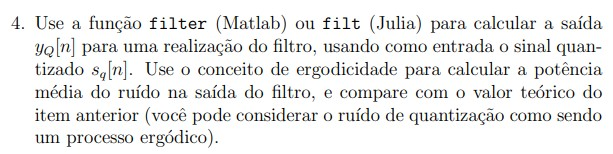

In [14]:
#Quantização dos coeficientes do filtro
Bc = 12 #Precisão finita com 12 bits para quantização dos coeficientes do filtro 

bq = Float64.(Fixed{Int16,Bc-1}.(b));
aq = Float64.(Fixed{Int16,Bc-1}.(a));

hq = PolynomialRatio(bq,aq);

#Quantização do sinal de entrada
fa=40000
t=0:(1/fa):3
f0=100*π;
s=0.5*cos.(2*π*f0*t)+0.3*cos.(4*π*300*t)+0.15*cos.(6*π*f0*t);

B0=12; #Precisão finita com 12 bits para quantização do sinal de entrada

sq12=Fixed{Int16,B0-1}.(s);

sq8=Fixed{Int16,8-1}.(s);

sq4=Fixed{Int16,4-1}.(s);

In [15]:
# Comparacao sinal original vs quantizado
p1 = plot(t[100:1000], s[100:1000], linewidth = 1, xlabel = "n", label = "s[n]")
p2 = plot(t[100:1000], sq12[100:1000], linewidth = 1, xlabel = "n", label = "sq[n] 12 bits")
p3 = plot(t[100:1000], sq8[100:1000], linewidth = 1, xlabel = "n", label = "sq[n] 8 bits")
p4 = plot(t[100:1000], sq4[100:1000], linewidth = 1, xlabel = "n", label = "sq[n] 4 bits")


plot(p1, p2, p3, p4, layout = (4,1))


<!DOCTYPE html>
 
 
 Plots.jl

In [16]:
# Comparacao sinal original vs quantizado (ampliada)
plot(t[100:110], s[100:110], linewidth = 1, xlabel = "n", label = "s[n]")
plot!(t[100:110], sq12[100:110], linewidth = 1, xlabel = "n", label = "sq[n] 12 bits")
plot!(t[100:110], sq8[100:110], linewidth = 1, xlabel = "n", label = "sq[n] 8 bits")
plot!(t[100:110], sq4[100:110], linewidth = 1, xlabel = "n", label = "sq[n] 4 bits")

<!DOCTYPE html>
 
 
 Plots.jl

In [17]:
y = filt(hq,s);

yq = filt(hq,sq12); #considerando precisão de 12 bits

ϵ_in = sq12 - s;

ϵ_out = yq - y;

Potϵ_out=var(ϵ_out); #considerando ergodicidade do ruído de quantização

print("Potência média do ruído na saída do filtro: ", Potϵ_out, " W \n")
print("Potência média do ruído na saída do filtro: ", pow2db(Potϵ_out), " dB")

Potência média do ruído na saída do filtro: 1.3770967867374556e-9 W 
Potência média do ruído na saída do filtro: -88.61035535074359 dB

### Comparação entre valor teórico e valor simulado

| Valor | Teórico | Simulado |
| :---: | :---: | :---: |
| Pot média ϵQ (W)  | 1.3727664232757097e-9 W| 1.3770967867374556e-9 W |
| Pot média ϵQ (dB) |  -88.6240335184707 dB | -88.61035535074359 dB |


In [18]:
#Desvio percentual do valor teórico em relação ao prático
print("\n")
print("Desvio (%) entre simulado e teórico em W = ", ((max(PotϵQ,Potϵ_out)-min(PotϵQ,Potϵ_out))/max(PotϵQ,Potϵ_out))*100," %")
print("\n")
print("Desvio (%) entre simulado e teórico para dB = ", ((max(pow2db(PotϵQ),pow2db(Potϵ_out))-min(pow2db(PotϵQ),pow2db(Potϵ_out)))/max(pow2db(PotϵQ),pow2db(Potϵ_out)))*100," %")
print("\n")


Desvio (%) entre simulado e teórico em W = 0.3144559992769459 %
Desvio (%) entre simulado e teórico para dB = -0.015436308400937487 %


Assim, temos que o desvio entre os valores teórico e simulado é menor que 1%, o que indica que o programa foi capaz de simular a situação prática com desempenho adequado para o projeto do Filtro com Precisão Finita e Quantização.

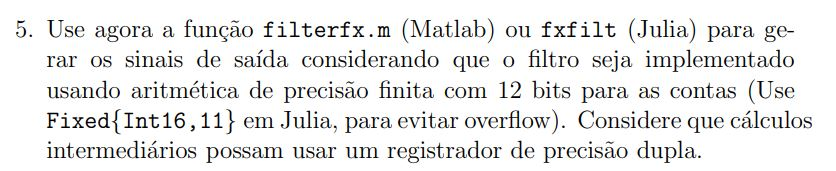

In [19]:
# Quantizando 'a' e 'b'
bq = Fixed{Int16,11}.(b)
aq = Fixed{Int16,11}.(a)

hq = PolynomialRatio(Float64.(bq),Float64.(aq))
hdenq = PolynomialRatio([1],Float64.(aq))
Hq = freqz(hq,ω)

# Voltando para 12 bits
ycq = fxfilt(bq,aq,Fixed{Int16,11}.(s),true) # precisao dupla em cálculos intermediários = true
yqcq = fxfilt(bq,aq,Fixed{Int16,11}.(sq),true) # precisao dupla em cálculos intermediários = true

120001-element Array{Q4f11,1} with eltype Q4f11:
  0.0078Q4f11
  0.0244Q4f11
  0.0449Q4f11
  0.0732Q4f11
  0.1108Q4f11
  0.1587Q4f11
  0.2163Q4f11
  0.2817Q4f11
  0.3525Q4f11
  0.4253Q4f11
  0.4966Q4f11
  0.563Q4f11
  0.6216Q4f11
  ⋮
 -0.1367Q4f11
 -0.1274Q4f11
 -0.1206Q4f11
 -0.1162Q4f11
 -0.1147Q4f11
 -0.1162Q4f11
 -0.1201Q4f11
 -0.1265Q4f11
 -0.1357Q4f11
 -0.1475Q4f11
 -0.1606Q4f11
 -0.1753Q4f11

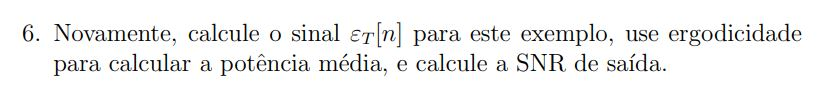

In [20]:
PotRcqT = Pote*sum(impz(hq,500).^2)+σin*sum(impz(hdenq,500).^2)

SNRsaidacqT = pow2db(Pots/PotRcqT)

epsilon_t = yqcq - ycq

Pot_e_t = var(epsilon_t)

SNRsaidaq = pow2db(Pots/Pot_e_t)
print("Potência média quantizada: ", Pot_e_t, "\n")
print("SNR quantizado: ", SNRsaidaq, " dB")

Potência média quantizada: 0.00012214649782244815
SNR quantizado: 31.713969958221547 dB

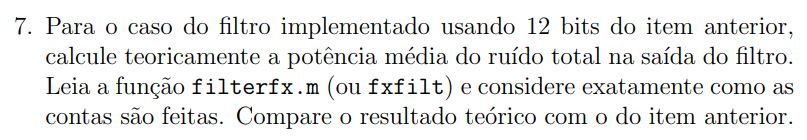

$ E\{E_{eq}^2\} = \sigma^2 = \frac{2^{-2B_c}}{3} $  

Potência de $E_{in}$:  
$ P_{rQteorico} = \sigma^2_0 \cdot \sum_{n=0}^{\inf} hq[n]^2 $  

Potência de $E_q$:  
$ P_{EqRteorica} = \sigma^2 \cdot \sum_{n=0}^{\inf} hq_{den}[n]^2 $  

Potência total teórica do ruído:  
$ P_{RTeorica} = P_{rQteorico}+P_{EqRteorica} = 5,61 \cdot 10^{-5} <=> SNR_{teorica} = 10\cdot log_{10}(\frac{P_{in}}{P_{RTeorica}}) = 35,09 dB$  
  

| Valor | Teórico | Simulado |
| :---: | :---: | :---: |
| Pot ϵQ (W)  | 5,61 E-5 | 1,22 E-4 |
| SNR (dB) |  35,09 | 31,71 |
   
   
Dos dados acima pudemos perceber uma grande variação, maior que apresentada nos itens anteriores. Isso se deve, neste caso, aos polos do filtro serem afetados pela quantização, causando uma fração maior de erro. Para evitar o problema, devemos usar mais bits na hora de quantizar os coeficientes do filtro.

In [21]:
#Desvio percentual do valor teórico em relação ao prático
print("\n")
print("Desvio (%) entre potências = ", ((1.22e-4 - 5.91e-5)/1.22e-4)*100," %")
print("\n")
print("Desvio (%) entre SNR = ", ((35.09-31.71)/35.09)*100," %")
print("\n")


Desvio (%) entre potências = 51.55737704918033 %
Desvio (%) entre SNR = 9.632373895696785 %


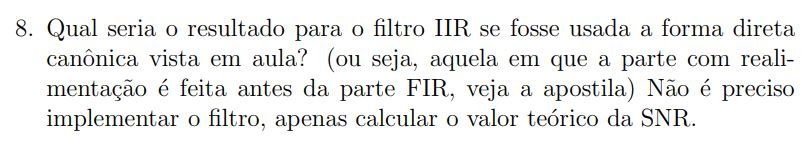

Potência do ruído na saída:

$P_{Rcanonica} = (\sigma_{0}^2 + \sigma^2) \cdot \sum_{n=0}^{\inf} hq[n]^2 + \sigma^2 = 2,24 \cdot 10^-5$

SNR:

$SNR_{canonica} = 10 \cdot log_{10}(\frac{P_{in}}{P_{Rcanonica}}) = 39,07 dB$

Se mostrando assim melhor do que o método anterior, pois insere menos ruído ao sinal.